# Math201 Project
### Data analysis on Egypt High School Grades (Thanaweya Amma) using a <br>Multi Linear Regression model and visuals. 
Mohamed Galal Elgemeie <b>(202000206)</b> <br>Ahmed Kamal Ahmed <b>(211000202)</b> <br>Mohammed ismail <b>(202003000)</b> <br>Hesham Reda <b>(19105550)</b> <br>Ibrahim Moustafa <b>(202000938)</b> <br>

# 1- SetUp

#### import main libraries and modules for analysis.
Pandas: module used for Data analysis<br>
statsmodels.api: module used to import the multi linear regression model.<br>
matplotlib.pyplot: used to visulize the data with scatterplots and bar charts.<br>
sklearn.preprocessing: used to import the scaler which changes the range of values a column can contain.

In [2]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm  
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
df=pd.read_csv("students_data_annoynmous_names.csv")
df.head(3)

,StudentId,TotalGrades,TotalPercentage,Name,School,EducationZone,Status,EductionType,Department,Arabic,...,Philosophy,Psychology,Chemistry,Biology,Geology,AppliedMath,Physics,Religion,NationalEducation,Statistics
0,0,179.0,43.66%,الأستاذ مشفق إياد,1,الدقى,راسب,طلاب,علمي علوم,45,...,NaN,NaN,16,30,25,NaN,30,إجتياز,إجتياز,إجتياز
1,1,342.0,83.41%,الأستاذ صخر وهبة,1,الدقى,ناجح,طلاب,علمي علوم,68,...,NaN,NaN,45,48,54,NaN,46,إجتياز,إجتياز,إجتياز
2,2,303.0,73.90%,ضرغام سوميرة,1,الدقى,ناجح,طلاب,علمي علوم,64,...,NaN,NaN,30,53,51,NaN,44,إجتياز,إجتياز,إجتياز


# 2- Clean The Dataset

##### Create Dummy variables that store the values of a column in binary format
Dummy variables contain a one if the category is present and zero otherwise, each row always has one (1) all the categories<br><br>adaby:  Adaby<br>math science:  Alm Ryada<br>science science:  Alm Aloom<br>undefined:  Students who failed and thier education method wasn't mentioned<br><br>sec_trial:  second trial students<br>fail:  students who failed<br>pass:  students who passed

In [3]:
df[['adaby','math science','science science','undefined']]=pd.get_dummies(df['Department'])
df[['sec_trial','fail','pass']]=pd.get_dummies(df['Status'])
df.head(3)

,StudentId,TotalGrades,TotalPercentage,Name,School,EducationZone,Status,EductionType,Department,Arabic,...,Religion,NationalEducation,Statistics,adaby,math science,science science,undefined,sec_trial,fail,pass
0,0,179.0,43.66%,الأستاذ مشفق إياد,1,الدقى,راسب,طلاب,علمي علوم,45,...,إجتياز,إجتياز,إجتياز,0,0,1,0,0,1,0
1,1,342.0,83.41%,الأستاذ صخر وهبة,1,الدقى,ناجح,طلاب,علمي علوم,68,...,إجتياز,إجتياز,إجتياز,0,0,1,0,0,0,1
2,2,303.0,73.90%,ضرغام سوميرة,1,الدقى,ناجح,طلاب,علمي علوم,64,...,إجتياز,إجتياز,إجتياز,0,0,1,0,0,0,1


##### remove the percentage sign in the Total percentage column

In [4]:
df.TotalPercentage=df.TotalPercentage.str[:-1]
df['TotalPercentage']=pd.to_numeric(df['TotalPercentage'])

##### Drop unnecessary columns in the dataset 
<b>Name, School, StudentID, EducationZone</b>: all of them are usless to predicting the student's grade.<br><b> Religion, NationalEducation</b>: were removed due to having too many arabic string instead of int values.<br><b>EductionType</b>: only had two values (stduent, other kind) which were assigned to students who passed and students who failed respectively.

In [5]:
df.drop(['Name','School','StudentId','EducationZone','EductionType','Religion','NationalEducation','Status'],axis=1,inplace=True)
df.drop(df[df['undefined']==1].index,inplace=True)
df.drop(['undefined'],axis=1,inplace=True)
df.shape

(107431, 23)

#### Remove all the rows with String Values in Arabic, FirstForeignLanguage, SecondForeignLanguage
arabic_wrong contains all the possible arabic values.<br>
Check for the arabic words and remove rows that contain them.<br>
Convert all the values to intger type.

In [6]:
arabic_wrong = ['غائب', 'ملغى','مؤجل','إجتياز','معفى']
arabic_str = '|'.join(arabic_wrong)
df.drop(df.index[df['Arabic'].str.contains(arabic_str)],inplace=True)
df.drop(df.index[df['FirstForeignLanguage'].str.contains(arabic_str)],inplace=True)
df.drop(df.index[df['SecondForeignLanguage'].str.contains(arabic_str)],inplace=True)

df['Arabic']=pd.to_numeric(df['Arabic'])
df['FirstForeignLanguage']=pd.to_numeric(df['FirstForeignLanguage'])
df['SecondForeignLanguage']=pd.to_numeric(df['SecondForeignLanguage'])
print(df.shape)

(106265, 23)


In [7]:
df.head(3)

,TotalGrades,TotalPercentage,Department,Arabic,FirstForeignLanguage,SecondForeignLanguage,DiscreteMath,History,Geography,Philosophy,...,Geology,AppliedMath,Physics,Statistics,adaby,math science,science science,sec_trial,fail,pass
0,179.0,43.66,علمي علوم,45,13.0,20.0,NaN,NaN,NaN,NaN,...,25,NaN,30,إجتياز,0,0,1,0,1,0
1,342.0,83.41,علمي علوم,68,42.0,39.0,NaN,NaN,NaN,NaN,...,54,NaN,46,إجتياز,0,0,1,0,0,1
2,303.0,73.90,علمي علوم,64,37.0,24.0,NaN,NaN,NaN,NaN,...,51,NaN,44,إجتياز,0,0,1,0,0,1


## Education groups

#### Sort the Dataset into diffrent groups depending on the Thanawya Amma Education system
Sort all the students groups in diffrent Dataframes

In [8]:
adaby_df=df[df['adaby']==1]
alm_3lom_df=df[df['science science']==1]
alm_ryada_df=df[df['math science']==1]

##### size and percentage of each group

In [9]:
a=adaby_df.shape[0]
l=alm_3lom_df.shape[0]
r=alm_ryada_df.shape[0]
print(a,l,r)
print('adaby: ',a/(a+l+r)*100)
print('alm 3lom: ',l/(a+l+r)*100)
print('alm ryada: ',r/(a+l+r)*100)

46228 40576 19461
adaby:  43.50256434385734
alm 3lom:  38.183785818472685
alm ryada:  18.313649837669978


#### Remove all the irrelevant subjects to each group. Only keep the important columns.

In [10]:
adaby_df.drop(['Statistics','DiscreteMath','Chemistry','Biology', 'Geology',
               'AppliedMath', 'Physics','adaby', 'math science','science science','Department'], axis=1,inplace=True) 
alm_3lom_df.drop(['DiscreteMath','History', 'Geography', 'Philosophy','AppliedMath',
                  'Psychology','adaby', 'math science','science science','Department'], axis=1,inplace=True)
alm_ryada_df.drop(['History', 'Geography', 'Philosophy', 'Psychology', 'Biology',
                   'Geology','adaby', 'math science', 'science science','Department'], axis=1,inplace=True)

C:\Users\Mgala\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Check all the columns for arabic strings

In [11]:
for i in ['History', 'Geography', 'Philosophy', 'Psychology']:
    print('adaby',i,(adaby_df[adaby_df[i].str.contains(arabic_str)]).shape[0])
for i in ['Chemistry', 'Biology', 'Geology', 'Physics','Statistics']:
    print('alm3lom',i,(alm_3lom_df[alm_3lom_df[i].str.contains(arabic_str)]).shape[0])
for i in ['DiscreteMath', 'Chemistry', 'AppliedMath','Physics', 'Statistics']:
    print('almryada',i,(alm_ryada_df[alm_ryada_df[i].str.contains(arabic_str)]).shape[0])

adaby History 31
adaby Geography 26
adaby Philosophy 36
adaby Psychology 23
alm3lom Chemistry 74
alm3lom Biology 66
alm3lom Geology 55
alm3lom Physics 108
alm3lom Statistics 39741
almryada DiscreteMath 24
almryada Chemistry 26
almryada AppliedMath 34
almryada Physics 28
almryada Statistics 19075


#### as showen, The statistics subject seems to have the most string values that can't be used for analysis, and so , we will remove it.
As removing the rows that contain the arabic strings in the statistics column will delete a big portion of students

In [12]:
alm_3lom_df.drop(['Statistics'], axis=1,inplace=True)
alm_ryada_df.drop(['Statistics'], axis=1,inplace=True)

#### remove any string values in all the groups for all the subjects

In [13]:
for i in ['History', 'Geography', 'Philosophy', 'Psychology']:
    adaby_df.drop(adaby_df.index[adaby_df[i].str.contains(arabic_str)],inplace=True)
    adaby_df[i]=pd.to_numeric(adaby_df[i])
for i in ['Chemistry', 'Biology', 'Geology', 'Physics']:
    alm_3lom_df.drop(alm_3lom_df.index[alm_3lom_df[i].str.contains(arabic_str)],inplace=True)
    alm_3lom_df[i]=pd.to_numeric(alm_3lom_df[i])
for i in ['DiscreteMath', 'Chemistry', 'AppliedMath','Physics']:
    alm_ryada_df.drop(alm_ryada_df.index[alm_ryada_df[i].str.contains(arabic_str)],inplace=True)
    alm_ryada_df[i]=pd.to_numeric(alm_ryada_df[i])

C:\Users\Mgala\AppData\Local\Temp/ipykernel_15568/3509217463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adaby_df[i]=pd.to_numeric(adaby_df[i])
C:\Users\Mgala\AppData\Local\Temp/ipykernel_15568/3509217463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alm_3lom_df[i]=pd.to_numeric(alm_3lom_df[i])
C:\Users\Mgala\AppData\Local\Temp/ipykernel_15568/3509217463.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

#### Get the percentage of each Group.

In [14]:
a=adaby_df.shape[0]
l=alm_3lom_df.shape[0]
r=alm_ryada_df.shape[0]
print('adaby: ',a/(a+l+r)*100)
print('alm 3lom: ',l/(a+l+r)*100)
print('alm ryada: ',r/(a+l+r)*100)

adaby:  43.53381968497249
alm 3lom:  38.14494285525534
alm ryada:  18.321237459772178


### Check for any Null Values

In [15]:
adaby_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46128 entries, 83 to 109705
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalGrades            46128 non-null  float64
 1   TotalPercentage        46128 non-null  float64
 2   Arabic                 46128 non-null  int64  
 3   FirstForeignLanguage   46128 non-null  float64
 4   SecondForeignLanguage  46128 non-null  float64
 5   History                46128 non-null  float64
 6   Geography              46128 non-null  float64
 7   Philosophy             46128 non-null  float64
 8   Psychology             46128 non-null  float64
 9   sec_trial              46128 non-null  uint8  
 10  fail                   46128 non-null  uint8  
 11  pass                   46128 non-null  uint8  
dtypes: float64(8), int64(1), uint8(3)
memory usage: 3.7 MB


In [16]:
alm_3lom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40418 entries, 0 to 109951
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalGrades            40418 non-null  float64
 1   TotalPercentage        40418 non-null  float64
 2   Arabic                 40418 non-null  int64  
 3   FirstForeignLanguage   40418 non-null  float64
 4   SecondForeignLanguage  40418 non-null  float64
 5   Chemistry              40418 non-null  float64
 6   Biology                40418 non-null  float64
 7   Geology                40418 non-null  float64
 8   Physics                40418 non-null  float64
 9   sec_trial              40418 non-null  uint8  
 10  fail                   40418 non-null  uint8  
 11  pass                   40418 non-null  uint8  
dtypes: float64(8), int64(1), uint8(3)
memory usage: 3.2 MB


In [17]:
alm_ryada_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19413 entries, 28 to 109457
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalGrades            19413 non-null  float64
 1   TotalPercentage        19413 non-null  float64
 2   Arabic                 19413 non-null  int64  
 3   FirstForeignLanguage   19413 non-null  float64
 4   SecondForeignLanguage  19413 non-null  float64
 5   DiscreteMath           19413 non-null  float64
 6   Chemistry              19413 non-null  float64
 7   AppliedMath            19413 non-null  float64
 8   Physics                19413 non-null  float64
 9   sec_trial              19413 non-null  uint8  
 10  fail                   19413 non-null  uint8  
 11  pass                   19413 non-null  uint8  
dtypes: float64(8), int64(1), uint8(3)
memory usage: 1.5 MB


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106265 entries, 0 to 109951
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TotalGrades            106265 non-null  float64
 1   TotalPercentage        106265 non-null  float64
 2   Department             106265 non-null  object 
 3   Arabic                 106265 non-null  int64  
 4   FirstForeignLanguage   106265 non-null  float64
 5   SecondForeignLanguage  106265 non-null  float64
 6   DiscreteMath           19461 non-null   object 
 7   History                46228 non-null   object 
 8   Geography              46228 non-null   object 
 9   Philosophy             46228 non-null   object 
 10  Psychology             46228 non-null   object 
 11  Chemistry              60037 non-null   object 
 12  Biology                40576 non-null   object 
 13  Geology                40576 non-null   object 
 14  AppliedMath            19461 non-nul

# 3- Analysis 

## Q1) Which Subject in Adaby is considered the Hardest?<br>
### We can answer this by plotting the Data and See which studnets above 60% total percentage can score high in the selected subject.<br><br>Also Created a normilized Version of the adaby group, because Arabic is graded from 80 so, we used a normilizer that turned the values range from 0 to 60 to better measure the diffrence<br><br>

<b>scaler</b>: function used to change the range of values for each column<br>
<b>adaby_normilized_60</b>: dataframe that contain the norimlized adaby dataframe

In [19]:
scaler = MinMaxScaler(feature_range=(0, 60))

#adaby_normilized_60 = pd.DataFrame(scaler.fit_transform(adaby_df), columns=adaby_df.columns)
adaby_normilized_60=pd.DataFrame()
adaby_normilized_60[['Arabic', 'FirstForeignLanguage','SecondForeignLanguage',
                     'History', 'Geography', 'Philosophy',
                     'Psychology']] = scaler.fit_transform(adaby_df[['Arabic', 'FirstForeignLanguage','SecondForeignLanguage',
                                                                     'History', 'Geography', 'Philosophy','Psychology']])
scaler = MinMaxScaler(feature_range=(0,100))
adaby_normilized_60[['TotalGrades']] = scaler.fit_transform(adaby_df[['TotalGrades']])
adaby_normilized_60[['TotalPercentage']]=adaby_df[['TotalPercentage']]

##### Check for the change of values<br><br>as showen minimum values have changed for each column as expected

In [20]:
adaby_normilized_60.describe()

,Arabic,FirstForeignLanguage,SecondForeignLanguage,History,Geography,Philosophy,Psychology,TotalGrades,TotalPercentage
count,46128.000000,46128.000000,46128.000000,46128.000000,46128.000000,46128.000000,46128.000000,46128.000000,18359.000000
mean,32.292062,34.394758,34.487213,32.832282,33.789518,41.472956,35.397187,53.344278,59.175556
std,6.654355,10.558780,12.979602,10.790797,10.036582,9.885560,8.184513,14.198096,11.119413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.440000
25%,30.000000,30.000000,29.230769,30.000000,29.491525,34.000000,28.928571,43.571429,51.710000
50%,31.500000,32.400000,30.769231,31.000000,32.542373,42.000000,36.428571,52.857143,59.020000
75%,36.000000,42.000000,43.076923,40.000000,40.677966,49.000000,41.785714,63.142857,66.830000
max,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,100.000000,92.680000


### The Empty Part of the Plots is String values that were deleted from the dataset, and rows that contained one Null values, so please ignore them.

#### Students who score higher than 60% get better scores in History more than Psychology

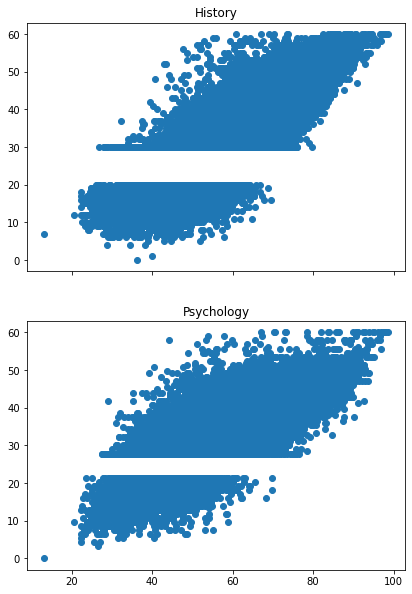

In [21]:
x=adaby_df.TotalPercentage
fig, (ax1, ax2) = plt.subplots(2,sharex=True)
ax1.set_title("History")
ax2.set_title("Psychology")
plt.subplots_adjust(bottom=-1, right=1, top=0.9)
ax1.scatter(x,adaby_normilized_60.History);
ax2.scatter(x,adaby_normilized_60.Psychology);

#### Students who Score more that 60% seem to do well on Philosophy and Geography

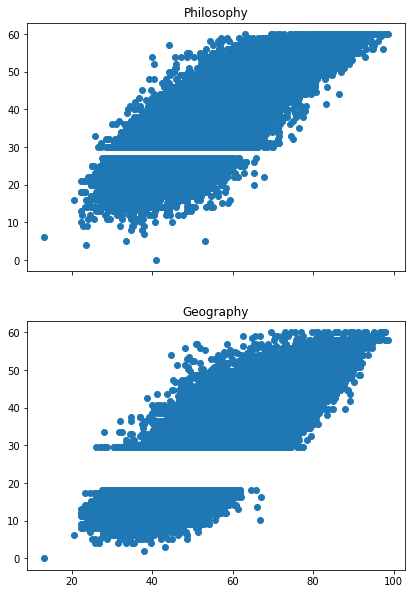

In [22]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True)
ax1.set_title("Philosophy")
ax2.set_title("Geography")
plt.subplots_adjust(bottom=-1, right=1, top=0.9)
ax1.scatter(x,adaby_normilized_60.Philosophy);
ax2.scatter(x,adaby_normilized_60.Geography);

#### Comparing Philosophy and arabic. It seems that students who score higher than 60% in adaby have the worst subject scores in arabic compared to other subjects.<br><br>The Decline in the arabic graph after 60% indicates that arabic could be the hardest subject

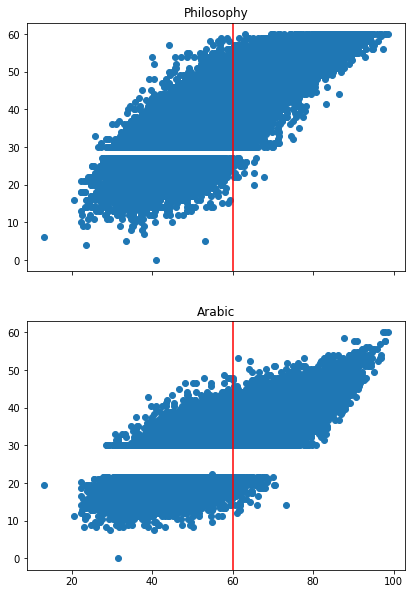

In [23]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True)
ax1.set_title("Philosophy")
ax2.set_title("Arabic")
plt.subplots_adjust(bottom=-1, right=1, top=0.9)
ax1.scatter(x,adaby_normilized_60.Philosophy);
ax2.scatter(x,adaby_normilized_60.Arabic);
ax1.axvline(x=60, ymin=0, ymax=60, color='r');
ax2.axvline(x=60, ymin=0, ymax=60, color='r');

### Conclusion<br>It seems that arabic does have a linear relation with the total grade that indicating that students find it harder than other subjects.<br>using a regression model, we will prove this relation numerically.

## Regression Model approach

#### Create a multi regression model to compare between the adaby subjects and thier relation with the Total Grade

In [24]:
adaby_normilized_60['intercept']=1
model = sm.OLS(adaby_normilized_60['TotalGrades'], adaby_normilized_60[['Arabic',
                                                                 'History', 
                                                                 'Geography', 
                                                                 'Philosophy', 
                                                                 'Psychology',
                                                                 'intercept']])
regression_model = model.fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalGrades   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.680e+05
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:23:19   Log-Likelihood:            -1.1967e+05
No. Observations:               46128   AIC:                         2.393e+05
Df Residuals:                   46122   BIC:                         2.394e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Arabic         0.4666      0.003    153.948      0.0


##### Coffecinets measure the relation between the dependent variable and the independent variables.<br>
<b>Coffecinet of 1 indicates that it is positively directly related, and 0 indicates no relationship between the variables.</b><br><b>intercept</b>: is used to center the R squared value which better calculates the Coffecinets<br><b>R squared</b>: shows the credibility of this report and how statistically correct is it



#### Output: Arabic has the biggest relation coefficient of 0.466 meaning that it is statistically correlated with the total grade.<br>The Report has an R squared value of 0.948 meaning we can say the past conclusion with 94% certainty<br><br><br><br>



### Remove all students that scored less than 30 in all subjects and less than 60 in the total grade.
Only keeping students with considirible good grades to better calculate the relation.


In [25]:
for i in ['History', 'Geography', 'Philosophy', 'Psychology','Arabic']:
    adaby_normilized_60.drop(adaby_normilized_60.index[adaby_normilized_60[i]<30],inplace=True)
    
adaby_normilized_60.drop(adaby_normilized_60.index[adaby_normilized_60['TotalGrades']<60],inplace=True)

In [26]:
adaby_normilized_60.shape

(14261, 10)

In [27]:
model = sm.OLS(adaby_normilized_60['TotalGrades'], adaby_normilized_60[['Arabic',
                                                                 'History', 
                                                                 'Geography', 
                                                                 'Philosophy', 
                                                                 'Psychology',
                                                                 'intercept']])
regression_model = model.fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalGrades   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                 1.336e+04
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:23:19   Log-Likelihood:                -35934.
No. Observations:               14261   AIC:                         7.188e+04
Df Residuals:                   14255   BIC:                         7.192e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Arabic         0.5252      0.006     94.759      0.0

#### Output: The Arabic coefficient only seemed to increase showing that with passing grade students, it seems that Arabic is directly related to the total grade, and this report is made with an 82% confidence level.<br><br>

## Q2) Who Does better in Chemistry and Physics: Alm Aloom or Alm Ryada?<br>
### Comparing Each's preformance on each Subject by plotting the data.

In [28]:
x1=alm_3lom_df.TotalPercentage
x2=alm_ryada_df.TotalPercentage

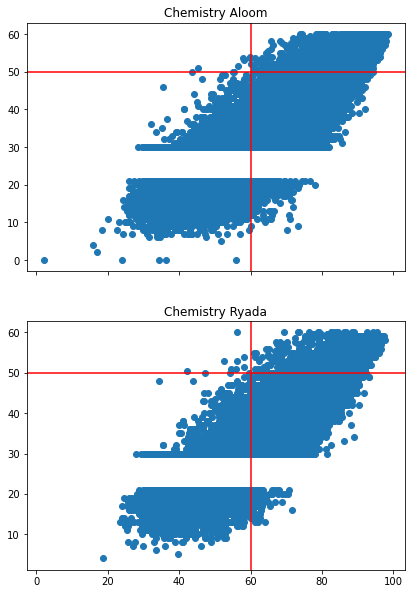

In [29]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True)
ax1.set_title("Chemistry Aloom")
ax2.set_title("Chemistry Ryada")
plt.subplots_adjust(bottom=-1, right=1, top=0.9)
ax1.scatter(x1,alm_3lom_df.Chemistry);
ax2.scatter(x2,alm_ryada_df.Chemistry);

ax1.axvline(x=60, ymin=0, ymax=60, color='r');
ax1.axhline(y=50, xmin=0, xmax=100, color='r');      
ax2.axvline(x=60, ymin=0, ymax=60, color='r');
ax2.axhline(y=50, xmin=0, xmax=100, color='r');      


#### Alm Ryada seems to do better in chemistry than alm aloom, as the Red lines show that students who score higher than 60% and have a chemistry score higher than 50 are mostly alm ryada but the difference is very slim.

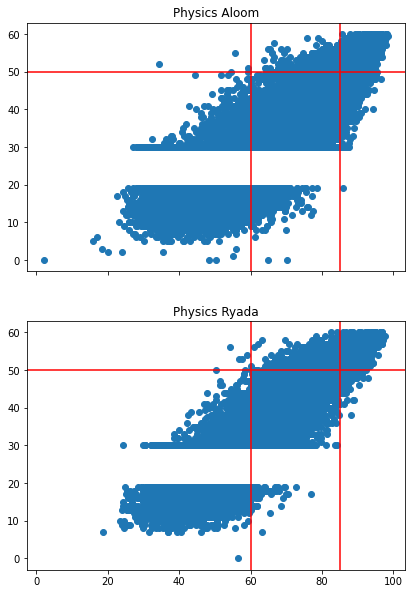

In [30]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True)
ax1.set_title("Physics Aloom")
ax2.set_title("Physics Ryada")
plt.subplots_adjust(bottom=-1, right=1, top=0.9)
ax1.scatter(x1,alm_3lom_df.Physics);
ax2.scatter(x2,alm_ryada_df.Physics);

ax1.axvline(x=60, ymin=0, ymax=60, color='r');
ax1.axhline(y=50, xmin=0, xmax=100, color='r');  
ax1.axvline(x=85, ymin=0, ymax=60, color='r');
ax2.axvline(x=60, ymin=0, ymax=60, color='r');
ax2.axhline(y=50, xmin=0, xmax=100, color='r');  
ax2.axvline(x=85, ymin=0, ymax=60, color='r');

#### The area blue area marked by the red lines show the portion of students who get less than 85% and more than 50 in Physics which is covered by more blue dots in the Alm Ryada group<br>
### Conclusion<br>Alm Ryada did better in Physics than Alm Aloom, and better in chemistry but with a negligible difference.<br>

## Q3) Who has the most passing/failing students 

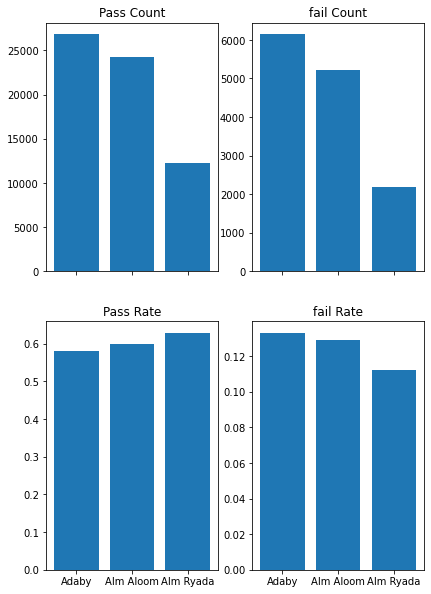

Rates of passing:
Adaby:0.5812
Alm Aloom:0.5998
Alm Ryada:0.6287


In [31]:
fig, ((ax1, ax3),(ax2,ax4)) = plt.subplots(2,2,sharex=True)
ax1.set_title("Pass Count")
ax2.set_title("Pass Rate")
ax3.set_title("fail Count")
ax4.set_title("fail Rate")
groups = ['Adaby','Alm Aloom','Alm Ryada']
pass_sum = adaby_df['pass'].sum(),alm_3lom_df['pass'].sum(),alm_ryada_df['pass'].sum()
pass_mean= adaby_df['pass'].mean(),alm_3lom_df['pass'].mean(),alm_ryada_df['pass'].mean()
fail_sum = adaby_df['fail'].sum(),alm_3lom_df['fail'].sum(),alm_ryada_df['fail'].sum()
fail_mean= adaby_df['fail'].mean(),alm_3lom_df['fail'].mean(),alm_ryada_df['fail'].mean()

plt.subplots_adjust(bottom=-1, right=1, top=0.9)
ax1.bar(groups,pass_sum);
ax2.bar(groups,pass_mean);
ax3.bar(groups,fail_sum);
ax4.bar(groups,fail_mean);
plt.show()
print('Rates of passing:\nAdaby:{}\nAlm Aloom:{}\nAlm Ryada:{}'.format(round(adaby_df['pass'].mean(),4),
                                                                        round(alm_3lom_df['pass'].mean(),4),
                                                                        round(alm_ryada_df['pass'].mean(),4)))

In [32]:
pass_sum

(26810, 24242, 12205)

In [33]:
adaby_df['fail'].sum(),alm_3lom_df['fail'].sum(),alm_ryada_df['fail'].sum()

(6142, 5210, 2177)

In [35]:
round(adaby_df['fail'].mean(),4),round(alm_3lom_df['fail'].mean(),4),round(alm_ryada_df['fail'].mean(),4)

(0.1332, 0.1289, 0.1121)

#### Adaby has the most count of students passed and failed, and the most fail rate of 0.133 compared to others of 0.13 and 0.112.<br>alm ryada has a pass rate of 0.63 while adaby has 0.58. 
### Conclusion<br>Students seem to fail the most in adaby, while more than half of the students in Alm Ryada seem to pass the most with a rate of 0.63.<br> Alm Aloom seems to be unbiased in terms of passing and failing